In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten,\
BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

2021-10-28 18:48:41.226264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 18:48:41.226340: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
train_path = 'training_set'
test_path = 'test_set'

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) 

train_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['cats', 'dogs'], batch_size=64,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['cats', 'dogs'], batch_size=64,subset='validation')

test_batches = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(\
directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], \
batch_size=64, shuffle=False)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

2021-10-28 13:44:39.933269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 13:44:40.030043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 13:44:40.030816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 13:44:40.032574: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',\
metrics=['accuracy'])

In [11]:
#model.fit_generator(x=train_batches,validation_ epochs=5, verbose=1)
hist = model.fit(
    train_batches,
    validation_data = validation_batches, 
    epochs = 10)

2021-10-28 13:44:43.338491: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-28 13:44:45.441686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


101/101 [==============================] - 72s 638ms/step - loss: 0.6702 - accuracy: 0.5810 - val_loss: 0.6359 - val_accuracy: 0.6365
Epoch 2/10
101/101 [==============================] - 34s 333ms/step - loss: 0.5969 - accuracy: 0.6843 - val_loss: 0.5913 - val_accuracy: 0.7039
Epoch 3/10
101/101 [==============================] - 33s 332ms/step - loss: 0.5552 - accuracy: 0.7186 - val_loss: 0.5647 - val_accuracy: 0.6958
Epoch 4/10
101/101 [==============================] - 34s 334ms/step - loss: 0.5291 - accuracy: 0.7369 - val_loss: 0.5560 - val_accuracy: 0.7058
Epoch 5/10
101/101 [==============================] - 33s 332ms/step - loss: 0.5112 - accuracy: 0.7472 - val_loss: 0.5415 - val_accuracy: 0.7258
Epoch 6/10
101/101 [==============================] - 34s 333ms/step - loss: 0.4805 - accuracy: 0.7706 - val_loss: 0.5459 - val_accuracy: 0.7277
Epoch 7/10
101/101 [==============================] - 34s 333ms/step - loss: 0.4621 - accuracy: 0.7803 - val_loss: 0.5258 - val_accuracy: 0.7

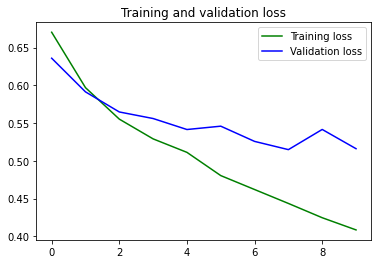

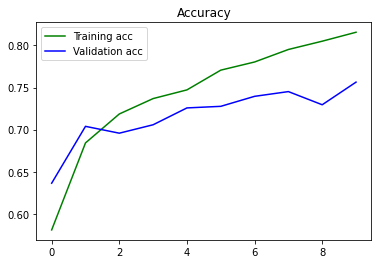

In [12]:
# Display models statistics
from matplotlib import pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochsr = range(10)
plt.figure()
plt.plot(epochsr, loss, 'g', label='Training loss')
plt.plot(epochsr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochsr, acc, 'g', label='Training acc')
plt.plot(epochsr, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()
mymodel = hist.model

In [13]:
# serialize model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
from tensorflow.keras.models import load_model

# load, create and compile model

#model = load_model("../input/models/model.h5")
model = load_model("model.h5")
model.summary()

2021-10-28 18:49:44.350717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-28 18:49:44.395426: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-28 18:49:44.395574: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arjun-HP-Laptop-14-cf0xxx): /proc/driver/nvidia/version does not exist
2021-10-28 18:49:44.397383: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[733 278]
 [212 800]]


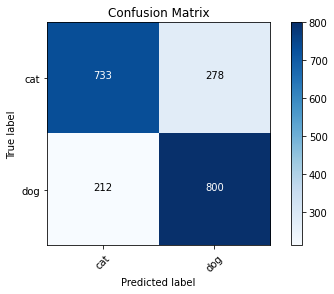

In [18]:
predictions = model.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, \
                      y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [20]:
model.evaluate(train_batches),model.evaluate(validation_batches),model.evaluate(test_batches)

32/32 [==============================] - 8s 255ms/step - loss: 0.5122 - accuracy: 0.7578


([0.3889991343021393, 0.8291692733764648],
 [0.5160942673683167, 0.7564022541046143],
 [0.5122155547142029, 0.757785439491272])

In [18]:
#Custom model test predictions (open downloaded images folder)
predictions = np.round(model.predict(test_imgs))
print(predictions)

2021-10-28 18:51:23.576727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [40]:
!pip install lime

In [16]:
def TestImgPreprocessing(path):
    '''
    Resizes all images in a given file path to (224,224) and MinMax scales 
    Return array of images
    Adapted from https://stackoverflow.com/questions/21517879/
    python-pil-resize-all-images-in-a-folder
    '''
    from PIL import Image
    import os
    dirs = sorted(os.listdir(path))
    images = []
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize = np.asarray(imResize)/255
            images.append(imResize)
    return np.asarray(images)

test_imgs = TestImgPreprocessing('downloaded_imgs/')

In [17]:
test_imgs.shape

(15, 224, 224, 3)

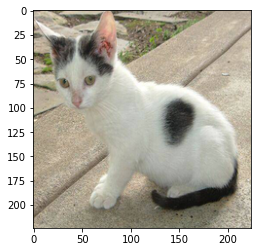

In [131]:
plt.imshow(test_imgs[5])

In [105]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[5], model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [106]:
model.predict(test_imgs)[5]

array([0.3883971 , 0.61160284], dtype=float32)

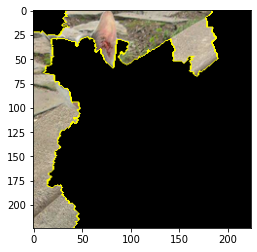

In [115]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=8, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

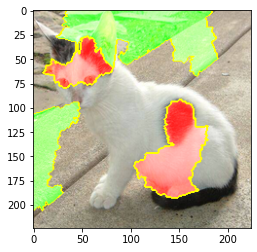

In [116]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=8, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

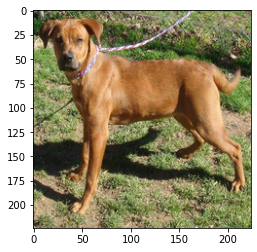

In [132]:
plt.imshow(test_imgs[9])

In [123]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[9], model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [124]:
model.predict(test_imgs)[9]

array([0.00828403, 0.99171597], dtype=float32)

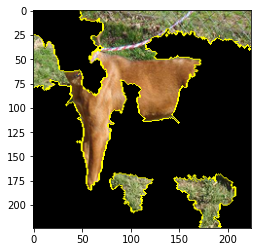

In [125]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=10, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

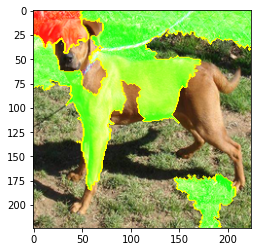

In [126]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

### MobileNet

In [28]:
mobile = tf.keras.applications.mobilenet.MobileNet()
model_mobilenet = Sequential()
for layer in mobile.layers[:-5]:
    model_mobilenet.add(layer)
    
for layer in model_mobilenet.layers[:-5]:
    layer.trainable = False
    
model_mobilenet.add(Dense(units=2, activation='softmax'))

17235968/17225924 [==============================] - 0s 0us/step


In [29]:
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001),\
                        loss='categorical_crossentropy', metrics=['accuracy'])

hist_mobile = model_mobilenet.fit(
    train_batches,
    validation_data = validation_batches, 
    epochs = 10)

Epoch 1/10
101/101 [==============================] - 36s 337ms/step - loss: 0.0907 - accuracy: 0.9619 - val_loss: 0.1196 - val_accuracy: 0.9563
Epoch 2/10
101/101 [==============================] - 34s 334ms/step - loss: 0.0321 - accuracy: 0.9889 - val_loss: 0.0778 - val_accuracy: 0.9713
Epoch 3/10
101/101 [==============================] - 34s 340ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0615 - val_accuracy: 0.9769
Epoch 4/10
101/101 [==============================] - 34s 339ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0434 - val_accuracy: 0.9844
Epoch 5/10
101/101 [==============================] - 34s 335ms/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0455 - val_accuracy: 0.9831
Epoch 6/10
101/101 [==============================] - 34s 336ms/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 0.0560 - val_accuracy: 0.9775
Epoch 7/10
101/101 [==============================] - 34s 342ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0394 - val_ac

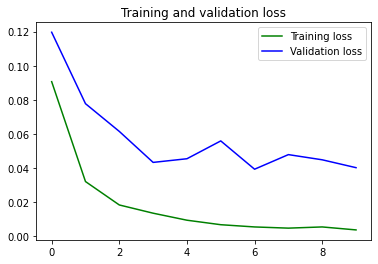

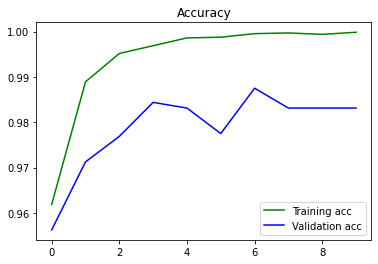

In [30]:
# Display models statistics
from matplotlib import pyplot as plt
loss = hist_mobile.history['loss']
val_loss = hist_mobile.history['val_loss']
acc = hist_mobile.history['accuracy']
val_acc = hist_mobile.history['val_accuracy']
epochsr = range(10)
plt.figure()
plt.plot(epochsr, loss, 'g', label='Training loss')
plt.plot(epochsr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochsr, acc, 'g', label='Training acc')
plt.plot(epochsr, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()
mymodel_mobile = hist_mobile.model

In [31]:
# serialize model
model_mobilenet.save("model_mobilenet.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
#model_mobilenet = load_model("../input/models/model_mobilenet_preprocess.h5")
model_mobilenet = load_model("model_mobilenet.h5")
model_mobilenet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

Confusion matrix, without normalization
[[1006    5]
 [  15  997]]


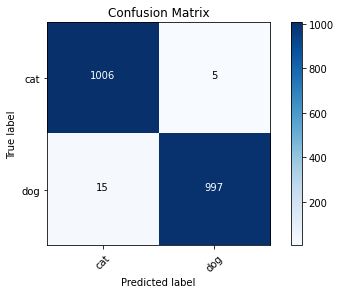

In [34]:
predictions = model_mobilenet.predict(x = test_batches, steps = len(test_batches), verbose = 0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [35]:
model_mobilenet.evaluate(train_batches),model_mobilenet.evaluate(validation_batches)\
,model_mobilenet.evaluate(test_batches)

32/32 [==============================] - 8s 262ms/step - loss: 0.0314 - accuracy: 0.9901


([0.0012913368409499526, 1.0],
 [0.04027627035975456, 0.9831355214118958],
 [0.03140566125512123, 0.9901136755943298])

In [96]:
#Custom model
predictions_mobilenet = np.round(model_mobilenet.predict(test_imgs))
print(predictions)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


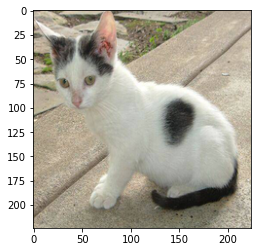

In [94]:
plt.imshow(test_imgs[5])

In [42]:
model_mobilenet.predict(test_imgs)[12]

array([1.9139389e-04, 9.9980861e-01], dtype=float32)

In [43]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, 
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[5], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
explanation.top_labels[0]

0

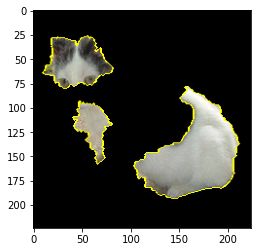

In [45]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, \
                                            num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

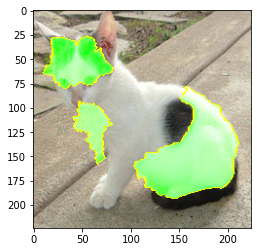

In [46]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], \
                        positive_only=False, num_features=5, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

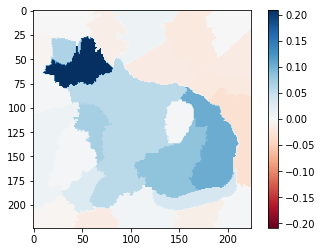

In [47]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

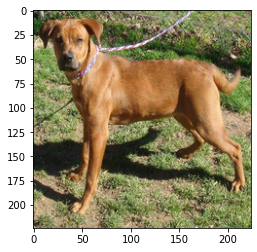

In [92]:
plt.imshow(test_imgs[9])

In [72]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[9], model_mobilenet.predict)

  0%|          | 0/1000 [00:01<?, ?it/s]

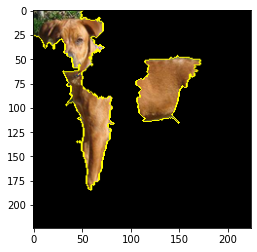

In [79]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=5, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

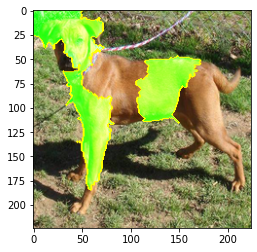

In [78]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=5, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

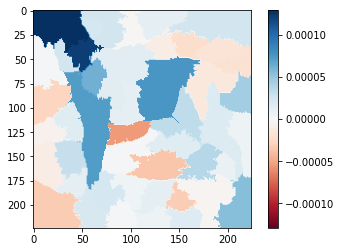

In [51]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

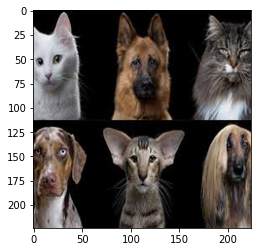

In [93]:
plt.imshow(test_imgs[14])

In [52]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[14], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

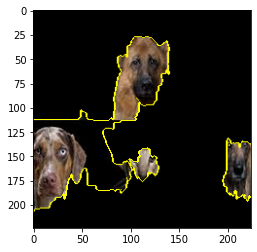

In [53]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=10, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

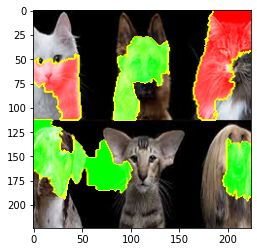

In [54]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

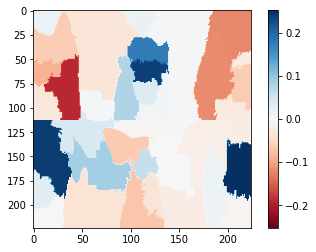

In [55]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [56]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[2], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

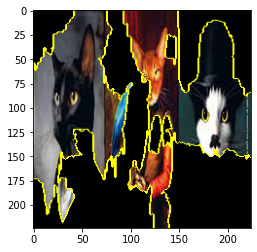

In [57]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=15, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

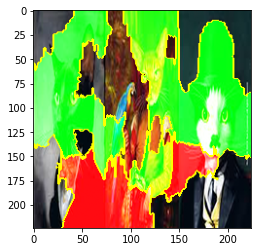

In [58]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=15, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))